In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import csv
import pandas as pd
df = pd.read_csv('hkfood.csv')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import Scatter, Layout
import numpy as np
from plotly.graph_objs import Bar
from plotly.offline import iplot

In [2]:
粤菜系=df['tags'].apply(lambda t:'粤' in str(t)).aggregate('sum')
日本菜系=df['tags'].apply(lambda t:'日本' in str(t)).aggregate('sum')
韩国菜系=df['tags'].apply(lambda t:'韩' in str(t)).aggregate('sum')
西餐=df['tags'].apply(lambda t:'西餐' in str(t)).aggregate('sum')
中餐=df['tags'].apply(lambda t:'中' in str(t)).aggregate('sum')
火锅类=df['tags'].apply(lambda t:'火锅' in str(t)).aggregate('sum')
甜品类=df['tags'].apply(lambda t:'甜' in str(t)).aggregate('sum')
快餐=df['tags'].apply(lambda t:'快' in str(t)).aggregate('sum')
米其林餐厅=df['tags'].apply(lambda t:'米' in str(t)).aggregate('sum')

In [3]:
mapping = (粤菜系,日本菜系,韩国菜系,西餐,中餐,火锅类,甜品类,快餐,米其林餐厅)
mapping

(176, 73, 8, 67, 137, 60, 62, 92, 37)

In [4]:
df['tags'].describe()

count             698
unique             84
top       标签:茶餐厅   粤菜
freq               81
Name: tags, dtype: object

Defferent types of food restaurants proportion statistics 
====
What I find in tags?
----
Through the above statistics, it is found that in Hong Kong, cantonese cuisine and Chinese restaurants still occupy an absolute majority in the market. After that, the popular cuisines include Japanese food, western food and so on. Through keyword search, the tags of fast food restaurants also appear in tags with high word frequency. Compared with michelin-starred restaurants with only a third of the tags, more people prefer affordable tea restaurants.

The hottest features of top10 restaruants
====

From the bar chart, we can see that Hong Kong people's favorite dishes are cha chaan teng restaurant dishes(such as 菠萝包，猪扒包，冻奶茶).

But it is worth pondering whether the data are due to local eating habits or the large number of visitors to Hong Kong.


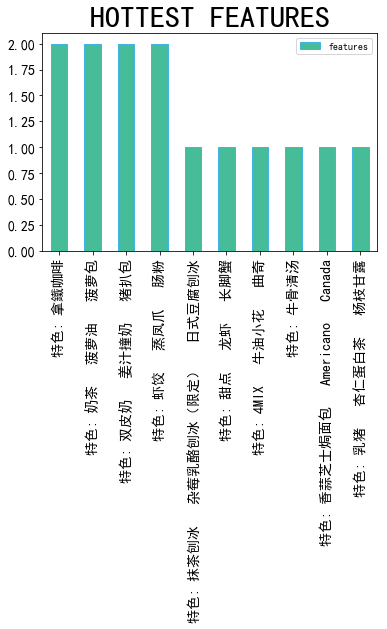

In [5]:
country = pd.DataFrame(df['features'].value_counts()[:10])
ax2 = country.plot(kind = 'bar',color = '#46bc99',edgecolor = '#40b4e5',fontsize=14)
ax2.set_title("HOTTEST FEATURES",fontsize=30)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

Are downgrades in consumption real?
====

By observing the average prices of the top10 restaurants, we find that all of them are above 300HKD, which proves that Hong Kong consumers have a strong ability to spend on food.

But compare with the analysis of article"18张图，看3万条”开饭“数据，我觉得危机不远了"：

Why is there such a difference between data from OpenRice and DianPing? 
----

Can it be speculated that the strong spending power of visitors to Hong Kong and the different habits of people in the two places in using software result in this?

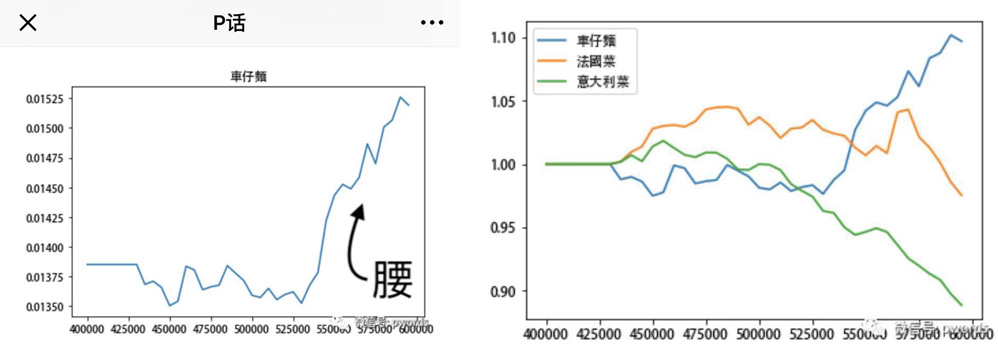

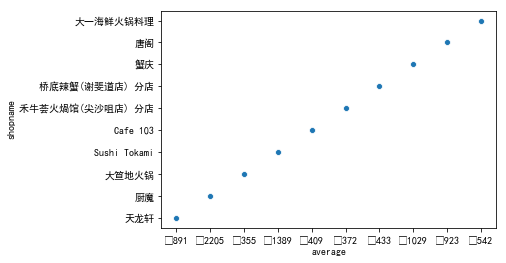

In [6]:
import seaborn as sns
ax = sns.scatterplot(x="average", y="shopname",data=df[:10])
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

from IPython.display import Image
Image("111.jpg") 

In [7]:
pd_df4 = df.pivot_table(columns=['average'], values='shopname', aggfunc='count')
#select rows with popular cuisine, changes rows to columns for better overview of each cuisine price range, and replace the nan value with 0
pd_df4 = df[:50].T
pd_df4.style.bar(color='#d65f5f')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
shopname,天龙轩,厨魔,大笪地火锅,Sushi Tokami,Cafe 103,禾牛荟火煱馆(尖沙咀店) 分店,桥底辣蟹(谢斐道店) 分店,蟹庆,唐阁,大一海鲜火锅料理,喜记避风塘炒辣蟹(湾仔总店),御宝轩,Aqua,镛记酒家,喜记蟹将军,不倒翁中日火锅料理(国际广场店) 分店,一番風味,阿一海景饭店,阿甘虾餐厅(凌霄阁店),Burgeroom(铜锣湾店),翠林辣蟹舫,大红袍火锅料理(尖沙咀店),太湖海鲜城(铜锣湾店) 分店,2DP 茶•甜品,茶记冰室,桥底辣蟹(骆克道三店) 分店,龍麵館,天虹海鲜酒家(索罟湾店),新南苑私房菜火锅鸡煲(旺角店),酒锅,渔获浜烧,龙皇酒家(世贸中心店) 分店,阿一海景饭店(铜锣湾店),富記海鮮酒家,甜姨姨私房甜品,全记海鲜菜馆(海傍街店) 分店,沙嗲王(山东街店) 分店,ÉPURE,Amber Coffee Brewery,好时沙嗲,御满屋日本料理,海皇粥店(尖沙咀店),酒锅(尖沙咀店),磯野水產,響日本燒肉,不倒翁中日火锅料理(铜锣湾店) 分店,Mad for Garlic,饮茶(尖沙咀店),永年士多(尖沙咀店),大冒险家餐厅
tags,标签:粤菜 中餐 米其林二星,标签:更多美食 米其林三星,标签:火锅,标签:日本料理,标签:自助餐,标签:火锅,标签:海鲜 中餐,标签:日本料理,标签:粤菜 中餐 米其林二星,标签:火锅,标签:中餐,标签:粤菜 中餐,标签:西餐 日本料理,标签:中餐 粤菜,标签:中餐 海鲜,标签:火锅,标签:粤菜 中餐,标签:粤菜 中餐 米其林一星,标签:西餐,标签:小吃快餐 汉堡,标签:粤菜 海鲜,标签:火锅,标签:海鲜,标签:冰淇淋 甜品,标签:茶餐厅 粤菜,标签:海鲜,标签:中餐,标签:海鲜 中餐,标签:火锅,标签:火锅,标签:日本料理,标签:粤菜 中餐,标签:粤菜 中餐,标签:粤菜 海鲜,标签:面包甜点,标签:中餐 海鲜,标签:东南亚菜,标签:法国菜 西餐,标签:咖啡厅,标签:东南亚菜,标签:日本料理 自助餐,标签:小吃快餐,标签:火锅,标签:日本料理,标签:日本料理,标签:火锅,标签:西餐,标签:粤菜 中餐,标签:小吃快餐,标签:东南亚菜
address&tel,地址:尖沙咀柯士甸道西1号环球贸易广场(ICC)香港丽思卡尔顿酒店102楼 +852-22632270,地址:湾仔庄士敦道60号船街 J-Senses 1楼8号铺 +852-28508371,地址:九龙旺角弥敦道613号飞达商业大厦3楼 +852-21552789,地址:海港城海洋中心二阶216A号铺 27713938,地址:尖沙咀柯士甸道西1号环球贸易广场香港丽思卡尔顿酒店103楼 +852-22632270,地址:尖沙咀金马伦道中国保险大厦1楼 +852-39973369,地址:湾仔谢斐道414-424地下1-2号 00852-25737698,地址:铜锣湾轩尼诗道525号澳门逸园中心地库 +852-26021600,地址:尖沙咀北京道8号香港朗廷酒店1楼及2楼 +852-21327898,地址:香港九龙尖沙咀宝勒巷3-7A号万事昌广场2楼1室 +852-28896986,地址:湾仔谢斐道379号1-4号铺地下 +852-28937565,地址:北京道1号10层 26139800,地址:尖沙咀北京道1号29楼 +852-34272288,地址:中环威灵顿街32-40号 +852-25221624,地址:尖沙咀弥敦道63号国际广场6楼602室铺到国际广场6楼 +852-23667565,地址:尖沙咀弥敦道63号ISQUARE国际广场23楼 +852-21521166,地址:香港特別行政區灣仔區湾仔道138号 +852-37021371,地址:九龙尖沙咀弥敦道63号国际广场29楼2902号铺 +852-23280983,地址:山顶道128号凌霄阁3楼304-305号铺 +852-28492867,"地址:Causeway Bay Paterson Street, No. 50-56 +852-28909130",地址:尖沙咀亚士厘道24-38号天星大厦1楼A座 +852-26289888,地址:尖沙咀金巴利道64-66A号顺辉大厦地下 +852-24684333,地址:铜锣湾骆克道463-483号铜锣湾广场二期9楼 +852-28930822,地址:九龙尖沙咀厚福街12-12A蓝马商业大厦地铺 +852-37059590,地址:葵涌石荫路60号金石楼地下2号铺 +852-22534168,地址:鹅颈骆克道421-425号雅阁苑 +852-28931289,地址:德輔道中68號萬宜大廈地鋪04 +852-25616688,地址:南丫岛索罟湾第一街，1，23-25号 +852-29828100,地址:旺角彌敦道678号華僑商業中心3樓全層 +852-28773690,地址:铜锣湾登龙街18号V Point 27楼 +852-23237098,地址:铜锣湾轩尼诗道525号澳门逸园中心18楼 25755677,地址:铜锣湾告士打道280号世贸中心12楼 28952288,地址:铜锣湾谢斐道535号25楼 +852-91006111,地址:索罟灣第一街9-10號地下 +852-29828516,地址:天后清风街13号地下 +852-25086962,地址:西贡海傍街53号地下 +852-27911195,地址:九龙旺角山东街48号泰丰大厦1-3楼 +852-27701711,地址:尖沙咀广东道5号海港城海洋中心4楼403号铺 31858330,地址:德輔道中140-142號富偉大廈G/F +852-31060872,地址:尖沙咀么地道63号好时中心148号铺电梯上一层 27399808,地址:旺角弥敦道655号胡社生行 +852-36223338,地址:尖沙咀乐道23号A +852-26972801,地址:尖沙咀天文台道8号2楼1号铺 +852-23219038,地址:銅鑼灣軒尼詩道525號澳門逸園中心19樓 +852-27663678,地址:佐敦白加仕街101號珀軒1樓 +852-28865528,地址:铜锣湾勿地臣街1号时代广场食通天11楼1101号 31029363,地址:铜锣湾勿地臣街1号时代广场食通天11楼1104号 +852-37522880,地址:尖沙咀加连威老道20-22号瑞生尖沙咀酒店3楼 +852-27511666,地址:尖沙咀加拿芬道46号地下7-8号 +852-24770110,地址:香港大屿山香港迪士尼乐园迷离庄园 35503388
average,¥891,¥2205,¥355,¥1389,¥409,¥372,¥433,¥1029,¥923,¥542,¥304,¥856,¥1116,¥344,¥374,¥726,¥234,¥1208,¥224,¥151,¥426,¥374,¥429,¥92,¥67,¥401,¥253,¥378,¥275,¥556,¥420,¥371,¥1194,¥310,¥45,¥488,¥81,¥570,¥64,¥81,¥188,¥61,¥482,¥846,¥361,¥489,¥241,¥147,¥46,¥122
features,特色: 黑豚叉烧 窝贴大虾多士 杨枝甘露,特色: 分子小笼包 佐贺牛排 松露汉堡包,特色: 大笪地花胶浓汤鸡锅 安格斯牛肉 花竹虾,特色: 金枪鱼大腹 海胆军舰 金枪鱼中腹,特色: 甜点 龙虾 长脚蟹,特色: 手切新鲜牛肉 现打虾滑 素翅冬瓜鸡汤底,特色: 桥底辣蟹 濑尿虾 蒜蓉蛏子王,特色: 蟹玉蒸蛋 活毛蟹海鲜盛合 燒鱈場蟹腳,特色: 三葱爆龙虾 唐阁宝盒饭 焗蟹盖,特色: 黑松露带子饺 手工切本地牛肉 金汤腿翅锅,特色: 避风塘炒蟹 招牌炒蚬 干炒牛河,特色: 流沙包 御寶濃湯大排翅 鮑汁燜鳳爪,特色: 松露意面 燒Tuna腩卷 薄烧和牛,特色: 烧鹅 酸姜皮蛋 叉烧,特色: 喜记正宗炒辣蟹 椒盐濑尿虾 清酒煮鲍鱼,特色: 雪花牛肉 手切牛肉 生猛大花竹虾,特色: 招牌黄金蟹粥 脆皮牛腩 避风塘炒虾,特色: 鲍鱼 招牌海鲜炒饭 红酒酱炆牛尾,特色: 阿甘虾儿童餐 猪仔骨 芝士海鲜饭,特色: 双层鹅肝牛肉汉堡 旋风芝士薯条 大烤菇芝士牛肉堡,特色: 避风塘炒蟹 黄金虾球 南非鲜鲍鱼,特色: 金屋藏娇 极上牛肉刺身 芝士墨鱼丸,特色: 姜米活鱼炒饭 金汤焗龙虾 濑尿虾,特色: 铁观音雪糕 半熟芝士焦糖炖蛋及云尼拿雪糕 2DP素牛大啡菇漢堡,特色: 燒薯牛柳粒 黃金蝦 千岛伴鬼马,特色: 炒蟹 避风塘炒赖尿虾 炒蚬,特色: 龙虾酥两件 龙虾面 龙肉汤面,特色: 赖尿虾 焗烤龙虾 东星斑,特色: 雞煲 海鲜火锅 生猛海鲜拼盘,特色: 掛架頂級安格斯牛頸脊 走火入鍋 黑松露蝦蟹餃,特色: 活貝漁獲浜燒盛合 味噌蟹甲罗烧配多士 香煎蒜片厚切牛舌,特色: 乳猪 杏仁蛋白茶 杨枝甘露,特色: 一哥鲍鱼酥 红酒酱炆牛尾 招牌砂锅炒饭,特色: 椒鹽瀨尿蝦 避風塘炒蟹 芝士紫薯焗扇贝,特色: 榴莲豆腐花 芒果大合奏 即撞木桶豆腐花,特色: 椒盐濑尿虾 芝士龙虾 蛏子王,特色: 白咖喱香茅猪扒饭 沙嗲牛肉粉絲 炒蟹,特色: 甜品 软餐包 银鳕鱼,特色: 手冲 Amber特饮 拿铁,特色: 海南雞

Location creates popularity
====

By expanding the list of popular restaurants to 50, we can find that most of the locations are located in Tsim Sha Tsui area and causeway bay area. This shows that the reasons for popular restaurants are also strongly related to the location (restaurants close to popular business circles are far more likely to be visited than other restaurants).

Rreference
====

1.python-for-data-and-media-communication-gitbook/notes-week-09

2."18张图，看3万条”开饭“数据，我觉得危机不远了",by 服老思